# Bayesian Analysis with Python written by Osvaldo Marthin - Chapter 3


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
<ipython-input-1-bcfeed8a5191>:16: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('img301.png', dpi=300, figsize=(5.5, 5.5))


<Figure size 432x288 with 0 Axes>

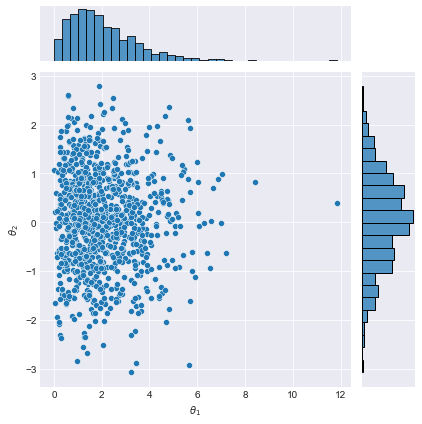

<Figure size 432x288 with 0 Axes>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import pymc3 as pm
import pandas as pd
plt.style.use('seaborn-darkgrid')
np.set_printoptions(precision=2)
pd.set_option('display.precision', 2)

np.random.seed(123)
x = np.random.gamma(2, 1, 1000)
y = np.random.normal(0, 1, 1000)
data = pd.DataFrame(data=np.array([x, y]).T, columns=['$\\theta_1$', '$\\theta_2$'])
sns.jointplot(x='$\\theta_1$', y='$\\theta_2$', data=data) #, stat_func=None);
plt.savefig('img301.png', dpi=300, figsize=(5.5, 5.5))

plt.figure()


<ipython-input-2-14ad982d0ad8>:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('img302.png', dpi=300, figsize=(5.5, 5.5))


<Figure size 432x288 with 0 Axes>

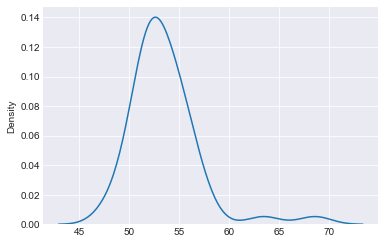

<Figure size 432x288 with 0 Axes>

In [2]:
data = np.array([51.06, 55.12, 53.73, 50.24, 52.05, 56.40, 48.45, 52.34,
55.65, 51.49, 51.86, 63.43, 53.00, 56.09, 51.93, 52.31, 52.33, 57.48, 
57.44, 55.14, 53.93, 54.62, 56.09, 68.58, 51.36, 55.47, 50.73, 51.94, 
54.95, 50.39, 52.91, 51.50, 52.68, 47.72, 49.73, 51.82, 54.99, 52.84, 
53.19, 54.52, 51.46, 53.73, 51.61, 49.81, 52.42, 54.30, 53.84, 53.16])

sns.kdeplot(data)
plt.savefig('img302.png', dpi=300, figsize=(5.5, 5.5))

plt.figure()



Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]
Sampling 4 chains, 0 divergences: 100%|██████████| 6400/6400 [00:05<00:00, 1277.79draws/s]
C:\VApps\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
<ipython-input-3-5ba5d53de819>:9: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('img304.png', dpi=300, figsize=(5.5, 5.5))


<Figure size 432x288 with 0 Axes>

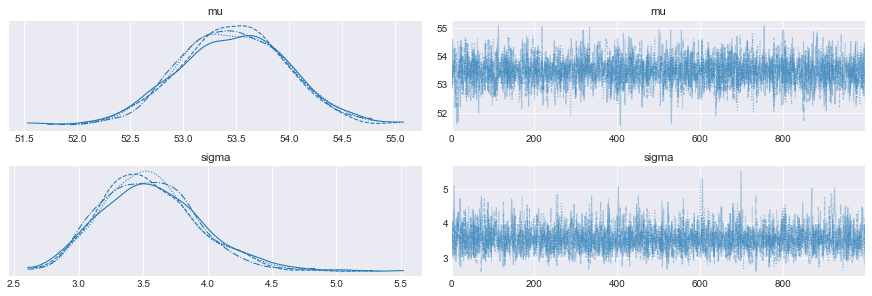

<Figure size 432x288 with 0 Axes>

In [3]:
with pm.Model() as model_g:
  mu = pm.Uniform('mu', 40, 75)
  sigma = pm.HalfNormal('sigma', sd=10)
  y = pm.Normal('y', mu=mu, sd=sigma, observed=data)
  trace_g = pm.sample(1100) #, njobs=1)

chain_g = trace_g[100:]
pm.traceplot(chain_g)
plt.savefig('img304.png', dpi=300, figsize=(5.5, 5.5))

plt.figure()


C:\VApps\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
<ipython-input-4-200e33b624f9>:3: DeprecationWarning: sample_ppc() is deprecated.  Please use sample_posterior_predictive()
  y_pred = pm.sample_ppc(chain_g, 100, model_g, size=len(data))
C:\VApps\Anaconda3\lib\site-packages\pymc3\sampling.py:1246: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(
100%|██████████| 100/100 [00:00<00:00, 999.98it/s]
<ipython-input-4-200e33b624f9>:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor release

<Figure size 432x288 with 0 Axes>

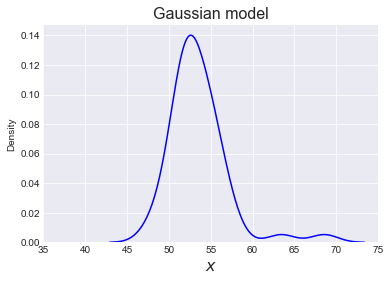

<Figure size 432x288 with 0 Axes>

In [4]:
df = pm.summary(chain_g)

y_pred = pm.sample_ppc(chain_g, 100, model_g, size=len(data))
sns.kdeplot(data, c='b')
#for i in y_pred['y']:
  #sns.kdeplot(i, c='r', alpha=0.1)
plt.xlim(35, 75)
plt.title('Gaussian model', fontsize=16)
plt.xlabel('$x$', fontsize=16)
plt.savefig('img305.png', dpi=300, figsize=(5.5, 5.5))

plt.figure()


<ipython-input-5-ff094efe5947>:13: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('img306.png', dpi=300, figsize=(5.5, 5.5))


<Figure size 432x288 with 0 Axes>

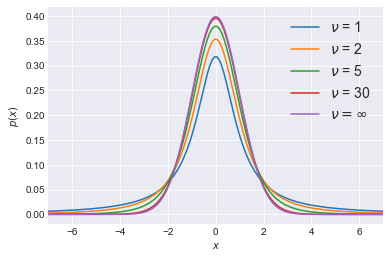

<Figure size 432x288 with 0 Axes>

In [5]:
x_values = np.linspace(-10, 10,200)
for df in [1, 2, 5, 30]:
  distri = stats.t(df)
  x_pdf = distri.pdf(x_values)
  plt.plot(x_values, x_pdf, label=r'$\nu$ = {}'.format(df))

x_pdf = stats.norm.pdf(x_values)
plt.plot(x_values, x_pdf, label=r'$\nu = \infty$')
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.legend(loc=0, fontsize=14)
plt.xlim(-7, 7)
plt.savefig('img306.png', dpi=300, figsize=(5.5, 5.5))

plt.figure()


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu, sigma, mu]
Sampling 4 chains, 0 divergences: 100%|██████████| 6400/6400 [00:05<00:00, 1194.06draws/s]
C:\VApps\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
<ipython-input-6-e11216b7951a>:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('img308.png', dpi=300, figsize=(5.5, 5.5))


<Figure size 432x288 with 0 Axes>

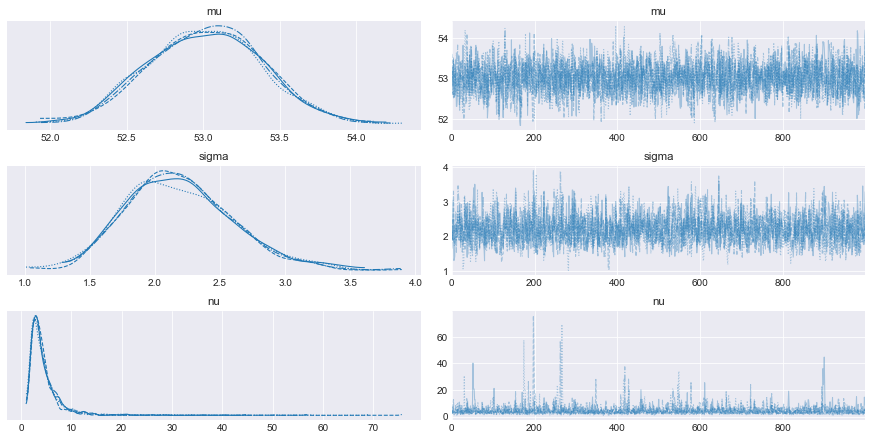

<Figure size 432x288 with 0 Axes>

In [6]:
with pm.Model() as model_t:
  mu = pm.Uniform('mu', 40, 75)
  sigma = pm.HalfNormal('sigma', sd=10)
  nu = pm.Exponential('nu', 1/30)
  y = pm.StudentT('y', mu=mu, sd=sigma, nu=nu, observed=data)
  trace_t = pm.sample(1100)

chain_t = trace_t[100:]
pm.traceplot(chain_t)
plt.savefig('img308.png', dpi=300, figsize=(5.5, 5.5))

plt.figure()


C:\VApps\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
<ipython-input-7-3bddc106d2f1>:4: DeprecationWarning: sample_ppc() is deprecated.  Please use sample_posterior_predictive()
  y_pred = pm.sample_ppc(chain_t, 100, model_t, size=len(data))
C:\VApps\Anaconda3\lib\site-packages\pymc3\sampling.py:1246: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(
100%|██████████| 100/100 [00:00<00:00, 1163.20it/s]
<ipython-input-7-3bddc106d2f1>:11: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releas

<Figure size 432x288 with 0 Axes>

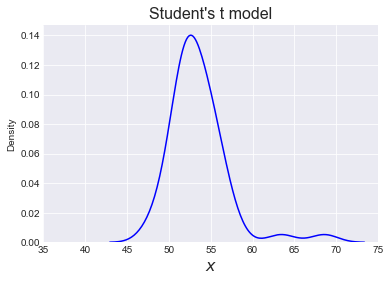

<Figure size 432x288 with 0 Axes>

In [7]:
#pm.df_summary(chain_t)
pm.summary(chain_t)

y_pred = pm.sample_ppc(chain_t, 100, model_t, size=len(data))
sns.kdeplot(data, c='b')
#for i in y_pred['y']:
  #sns.kdeplot(i, c='r', alpha=0.1)
plt.xlim(35, 75)
plt.title("Student's t model", fontsize=16)
plt.xlabel('$x$', fontsize=16)
plt.savefig('img309.png', dpi=300, figsize=(5.5, 5.5))

plt.figure()


<ipython-input-8-bdb8755373da>:5: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('img310.png', dpi=300, figsize=(5.5, 5.5))


<Figure size 432x288 with 0 Axes>

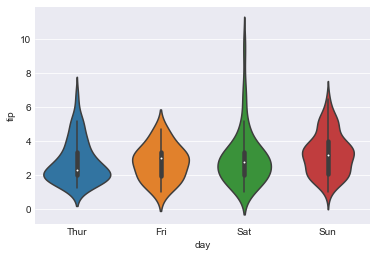

<Figure size 432x288 with 0 Axes>

In [8]:
tips = sns.load_dataset('tips')
tips.tail()

sns.violinplot(x='day', y='tip', data=tips)
plt.savefig('img310.png', dpi=300, figsize=(5.5, 5.5))

plt.figure()


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sds, means]
Sampling 4 chains, 0 divergences: 100%|██████████| 22000/22000 [00:11<00:00, 1837.11draws/s]
C:\VApps\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
<ipython-input-9-9504a8f1589a>:13: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('img311.png', dpi=300, figsize=(5.5, 5.5))


<Figure size 432x288 with 0 Axes>

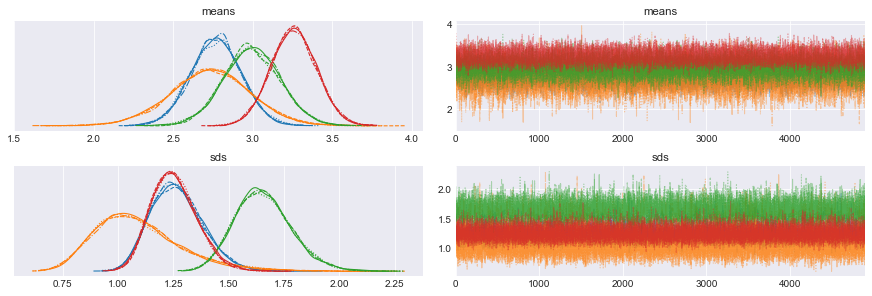

<Figure size 432x288 with 0 Axes>

In [9]:
y = tips['tip'].values
idx = pd.Categorical(tips['day']).codes

with pm.Model() as comparing_groups:
  means = pm.Normal('means', mu=0, sd=10, shape=len(set(idx)))
  sds = pm.HalfNormal('sds', sd=10, shape=len(set(idx)))

  y = pm.Normal('y', mu=means[idx], sd=sds[idx], observed=y)

  trace_cg = pm.sample(5000)
chain_cg = trace_cg[100::]
pm.traceplot(chain_cg)
plt.savefig('img311.png', dpi=300, figsize=(5.5, 5.5))

plt.figure()


<ipython-input-10-72a6c319c43d>:16: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('img312.png', dpi=300, figsize=(5.5, 5.5))


<Figure size 432x288 with 0 Axes>

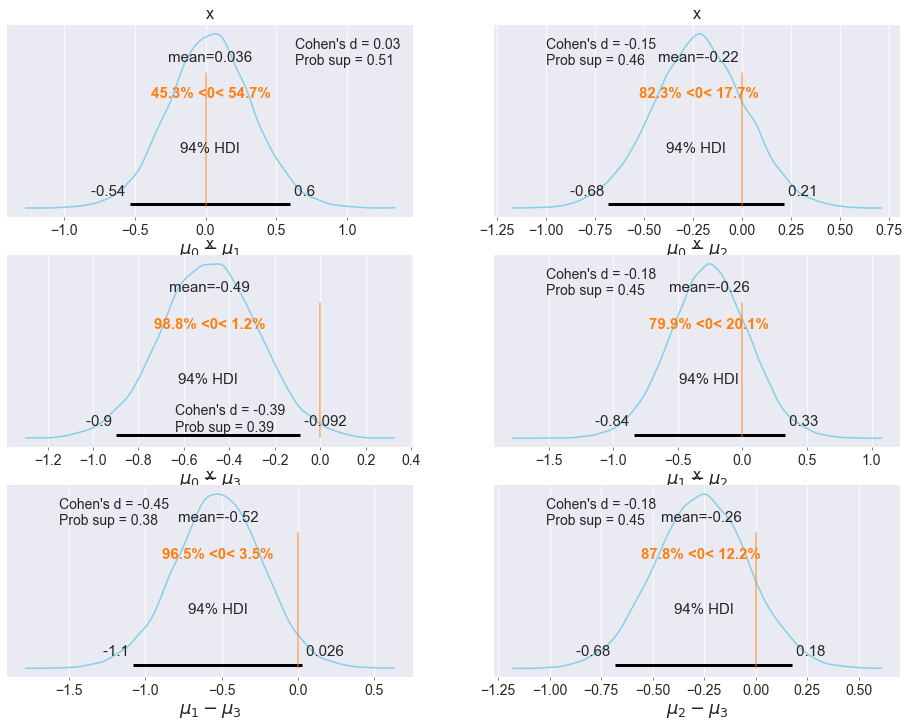

<Figure size 432x288 with 0 Axes>

In [10]:
dist = dist = stats.norm()
_, ax = plt.subplots(3, 2, figsize=(16, 12))

comparisons = [(i,j) for i in range(4) for j in range(i+1, 4)]
pos = [(k,l) for k in range(3) for l in (0, 1)]

for (i,j), (k,l) in zip(comparisons, pos):
  means_diff = chain_cg['means'][:,i]-chain_cg['means'][:,j]
  d_cohen = (means_diff / np.sqrt((chain_cg['sds'][:,i]**2 + chain_cg['sds'][:,j]**2) / 2)).mean()
  ps = dist.cdf(d_cohen/(2**0.5))

  pm.plot_posterior(means_diff, ref_val=0, ax=ax[k,l], color='skyblue') #, kde_plot=True)
  ax[k,l].plot(0, label="Cohen's d = {:.2f}\nProb sup = {:.2f}".format(d_cohen, ps), alpha=0)
  ax[k,l].set_xlabel('$\mu_{}-\mu_{}$'.format(i,j), fontsize=18)
  ax[k,l].legend(loc=0, fontsize=14)
plt.savefig('img312.png', dpi=300, figsize=(5.5, 5.5))

plt.figure()


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta, beta, alpha]
Sampling 4 chains, 429 divergences: 100%|██████████| 10000/10000 [00:10<00:00, 983.76draws/s]
There were 96 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7133356219591279, but should be close to 0.8. Try to increase the number of tuning steps.
There were 73 divergences after tuning. Increase `target_accept` or reparameterize.
There were 149 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7164017056930622, but should be close to 0.8. Try to increase the number of tuning steps.
There were 111 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7083543890556617, but should be close to 0.8. Try to inc

<Figure size 432x288 with 0 Axes>

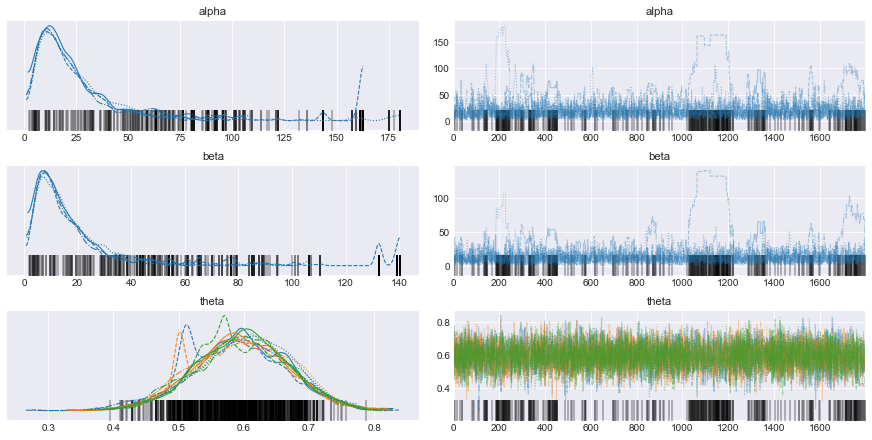

<Figure size 432x288 with 0 Axes>

In [11]:
N_samples = [30, 30, 30]
G_samples = [18, 18, 18]

group_idx = np.repeat(np.arange(len(N_samples)), N_samples)
data = []
for i in range(0, len(N_samples)):
  data.extend(np.repeat([1, 0], [G_samples[i], N_samples[i]- G_samples[i]]))

with pm.Model() as model_h:
  alpha = pm.HalfCauchy('alpha', beta=10)
  beta = pm.HalfCauchy('beta', beta=10)
  theta = pm.Beta('theta', alpha, beta, shape=len(N_samples))
  y = pm.Bernoulli('y', p=theta[group_idx], observed=data)

  trace_h = pm.sample(2000)
chain_h = trace_h[200:]
pm.traceplot(chain_h)
plt.savefig('img314.png', dpi=300, figsize=(5.5, 5.5))

plt.figure()


<ipython-input-12-6fa3658457b8>:14: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('img315.png', dpi=300, figsize=(5.5, 5.5))


<Figure size 432x288 with 0 Axes>

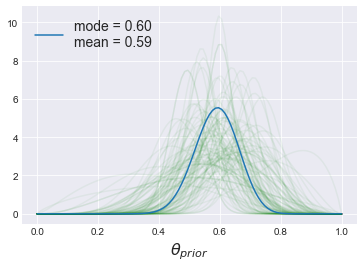

<Figure size 432x288 with 0 Axes>

In [12]:
x = np.linspace(0, 1, 100)
for i in np.random.randint(0, len(chain_h), size=100):
  pdf = stats.beta(chain_h['alpha'][i], chain_h['beta'][i]).pdf(x)
  plt.plot(x, pdf, 'g', alpha=0.05)

dist = stats.beta(chain_h['alpha'].mean(), chain_h['beta'].mean())
pdf = dist.pdf(x)
mode = x[np.argmax(pdf)]
mean = dist.moment(1)
plt.plot(x, pdf, label='mode = {:.2f}\nmean = {:.2f}'.format(mode, mean))

plt.legend(fontsize=14)
plt.xlabel(r'$\theta_{prior}$', fontsize=16)
plt.savefig('img315.png', dpi=300, figsize=(5.5, 5.5))

plt.figure()
